# Year 1 Design Simulations - Focusing on the Tissue in the middle of the probes

In [30]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import scipy.ndimage
from scipy.spatial import ConvexHull, Delaunay
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from neurophotonics.sim import Tissue
from neurophotonics import demix, fields
from neurophotonics.demix import SpikeSNR, Sample, Demix, Cosine
from neurophotonics.probe.probely import Probe, ProbeGroup
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
import datajoint as dj

## 1. Design Definitions

In [3]:
def design101(save=False, output="Design_v101.csv"):
    # Design 1 - 30 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-150, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([150, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG


def design102(save=False, output="Design_v102.csv"):
    # Design 1 - 60 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-180, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([180, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG


def design103(save=False, output="Design_v103.csv"):
    # Design 1 - 120 um separation - 75 degrees

    # Create 3 Probes at 0, 0, 0
    # 360 e-pixels
    P1 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P1",
    )

    # 4036 d-pixels
    P2 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[22, 240],
        d_box_length=5,
        d_box_sep=0,
        d_box_vertical_margin=5,
        d_box_horizontal_margin=5,
        name="P2",
    )

    P2.e_pixels = []

    # 360 e-pixels
    P3 = Probe(
        probe_dimensions=[1200, 120, 1300],
        n_e_box=[5, 60],
        e_box_length=10,
        e_box_sep=10,
        e_box_vertical_margin=5,
        e_box_horizontal_margin=15,
        n_d_box=[0, 0],
        d_box_length=0,
        d_box_sep=0,
        d_box_vertical_margin=0,
        d_box_horizontal_margin=0,
        name="P3",
    )

    PG = ProbeGroup([P1, P2, P3])

    # Position the Probes
    PG.probes[0].translate([-240, 0, 0])
    PG.probes[0].rotate_around(["br", "tr"], -75)

    PG.probes[2].translate([240, 0, 0])
    PG.probes[2].rotate_around(["bl", "tl"], 75)

    if save:
        df = PG.to_df()
        df.to_csv(output, index=False)

    return PG

In [4]:
D101 = design101()
D102 = design102()
D103 = design103()

/Users/tdincer/DJRepos/wci_pytest/neurophotonics/neurophotonics/probe/probely.py:322: RuntimeWarning: Mean of empty slice.
  xs -= xs.mean()
/Users/tdincer/opt/miniconda3/envs/djdev/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/tdincer/DJRepos/wci_pytest/neurophotonics/neurophotonics/probe/probely.py:331: RuntimeWarning: Mean of empty slice.
  zs -= zs.mean()


In [5]:
def create_beam_pattern(beam_2d, PG):
    centroids0 = np.array([e_pixel.centroid for e_pixel in PG.probes[0].e_pixels])
    centroids2 = np.array([e_pixel.centroid for e_pixel in PG.probes[2].e_pixels])

    angle0 = np.arctan(PG.probes[0].e_pixels[0].n[1] / PG.probes[0].e_pixels[0].n[0]) * 180 / np.pi
    angle2 = np.arctan(PG.probes[2].e_pixels[0].n[1] / PG.probes[2].e_pixels[0].n[0]) * 180 / np.pi

    top_five0 = centroids0[np.argsort(centroids0[:, -1])[:5]][:, :2]  # make it 2d
    top_five2 = centroids2[np.argsort(centroids2[:, -1])[:5]][:, :2]  # make it 2d

    image0 = sum(scipy.ndimage.shift(scipy.ndimage.rotate(beam_2d, 270 - angle2), [i[0] / 2.2, i[1] / 2.2]) for i in top_five0)
    image2 = sum(scipy.ndimage.shift(scipy.ndimage.rotate(beam_2d, 90 + angle2), [i[0] / 2.2, i[1] / 2.2]) for i in top_five2)
    image = image0 + image2

    image[image < 0] = 0 # Rotation (cubic interpolation) makes some pixels to have negative values
    return image

## 2. Tissue in the middle of the shanks overlayed on top of Probes

In [6]:
# Select on the points confined by the Probes.
def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    if not isinstance(hull, Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

In [7]:
def plot_probes_and_tissues(Designs, sample=8):
    sep = [30, 60, 120]
    for i, D in enumerate(Designs):
        probe_vertices = np.array([probe.__getattribute__(vert_name) for probe in D.probes for vert_name in ['bl', 'br', 'tl', 'tr']])
        D_hull = ConvexHull(probe_vertices)
        
        selection = (Demix & f"design={i}" & f"sample={sample}").fetch1('selection')
        print(f"Number of selections: {selection.shape}")
        spike_snrs = (SpikeSNR & f"design={i}" & f"sample={sample}").fetch1('snr')
        print(f"Number of spikesnrs: {spike_snrs.shape}")

        points = (Tissue & f"design={i}").fetch1('cell_xyz')
        print(f"Number of points: {points.shape}")

        points = points[selection]
        print(f"Number of points: {points.shape}")

        is_in_hull = in_hull(points, D_hull.points[D_hull.vertices])
        is_in_hull_indices = np.where(is_in_hull)[0]
        points_inside_the_hull = points[is_in_hull_indices]
        
        points_stat = points_inside_the_hull
        spike_snrs_stat = spike_snrs[is_in_hull_indices]
        
        print(sum(True for x in spike_snrs_stat if x>3)/len(spike_snrs_stat))
        

        fig = go.Figure()
        D.plot_shanks(show=False, cone=False, e_pixels=False, d_pixels=False, fig=fig)
        fig.add_traces(go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], opacity=0.4, mode='markers',
            marker={'size':4, 'color':['green' if x > 3. else 'red' for x in spike_snrs]},showlegend=False)) # df[c].snr.map(lambda x: 'gray' if (x<3) else 'green')
        fig.update_layout(autosize=False, width=900, height=900, title=f"Design-10{i+1} (Separation: {sep[i]} um)")

        fig.show()

plot_probes_and_tissues([D101, D102, D103])

Number of selections: (10057,)
Number of spikesnrs: (8381,)
Number of points: (10057, 3)
Number of points: (8381, 3)
0.997285374957584


Number of selections: (11876,)
Number of spikesnrs: (9896,)
Number of points: (11876, 3)
Number of points: (9896, 3)
0.9675531914893617


Number of selections: (15514,)
Number of spikesnrs: (12928,)
Number of points: (15514, 3)
Number of points: (12928, 3)
0.9280784598619688


## 3. SNR achieved vs Density

In [8]:
def SNRforTissueswithintheProbes(Designs, snr_threshold=3):
    sep = [30, 60, 120]
    all_snrs = []
    
    for i, D in enumerate(Designs):
        probe_vertices = np.array([probe.__getattribute__(vert_name) for probe in D.probes for vert_name in ['bl', 'br', 'tl', 'tr']])
        D_hull = ConvexHull(probe_vertices)
        
        for sample in range(9):
            selection = (Demix & f"design={i}" & f"sample={sample}").fetch1('selection')
            spike_snrs = (SpikeSNR & f"design={i}" & f"sample={sample}").fetch1('snr')

            points = (Tissue & f"design={i}").fetch1('cell_xyz')

            points = points[selection]

            is_in_hull = in_hull(points, D_hull.points[D_hull.vertices])
            is_in_hull_indices = np.where(is_in_hull)[0]
            points_inside_the_hull = points[is_in_hull_indices]

            points_stat = points_inside_the_hull
            spike_snrs_stat = spike_snrs[is_in_hull_indices]
            
            all_snrs.append((sum(True for x in spike_snrs_stat if x > snr_threshold ) / len(spike_snrs_stat)))

    return np.array(all_snrs).reshape(-1, 9)

all_snrs_3 = SNRforTissueswithintheProbes([D101, D102, D103], snr_threshold=3)
all_snrs_1 = SNRforTissueswithintheProbes([D101, D102, D103], snr_threshold=1)


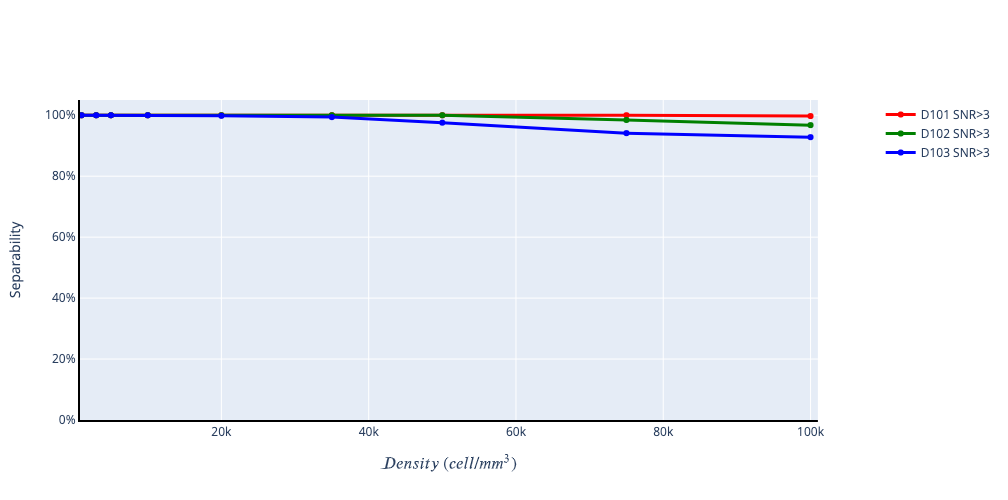

In [9]:
def plot_snr_density():
    density = Sample.fetch("density")

    colors = ['red', 'green', 'blue']

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    for i, (snrs_1, snrs_3) in enumerate(zip(all_snrs_1, all_snrs_3)):


    #    fig.add_trace(
    #        go.Scatter(x=density, y=snrs_1, mode="lines+markers", name=f"D10{i+1} SNR>1",
    #                   line=dict(color=colors[i], width=3), opacity=0.5,),
    #        secondary_y=False,
    #    )

        fig.add_trace(
            go.Scatter(x=density, y=snrs_3, mode="lines+markers", name=f"D10{i+1} SNR>3",
                       line=dict(color=colors[i], width=3)),
            secondary_y=False, 
        )

    fig.update_layout(
        #xaxis_range=[np.log10(800), np.log10(105_000)],
        xaxis_range=[800, 101_000],
        yaxis_range=[0, 1.05],
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        xaxis_title=r"$Density\ (cell/mm^3)$",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor="black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor="black", tickformat=".0%")
    fig.update_yaxes(title_text=r"Separability", secondary_y=False) 
    fig.update_layout(autosize=False, width=1000, height=500)
    fig.show()
    
plot_snr_density()


In [16]:
Cosine()

*design    *sample    cosines   
+--------+ +--------+ +--------+
0          0          =BLOB=    
0          1          =BLOB=    
0          2          =BLOB=    
0          3          =BLOB=    
0          4          =BLOB=    
0          5          =BLOB=    
0          6          =BLOB=    
0          7          =BLOB=    
0          8          =BLOB=    
1          0          =BLOB=    
1          1          =BLOB=    
1          2          =BLOB=    
   ...
 (Total: 27)

In [24]:
data = (Cosine * SpikeSNR).fetch(as_dict=True)

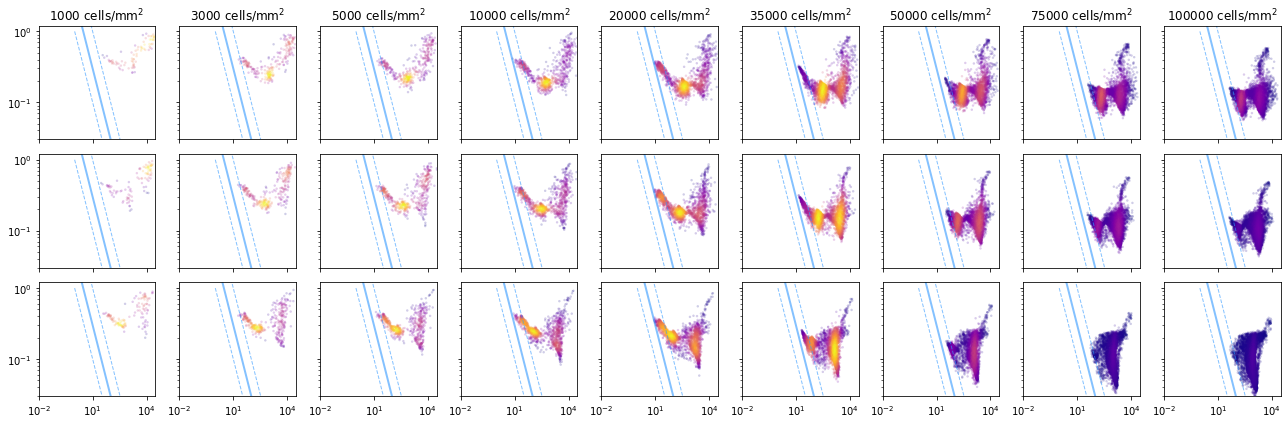

In [102]:
density = Sample.fetch('density')
fig, axs = plt.subplots(3, 9, figsize=(18, 6), sharex=True, sharey=True)
for i, (ax, datum) in enumerate(zip(axs.flat[:], data)):
    cos = datum['cosines']
    snr = datum['snr']
    
    cos = np.maximum(cos, 0.0009)
    snr = np.maximum(snr*3, 0.09)
    
    xy = np.vstack([np.log10(snr/cos)/4, np.log10(cos)*4])
    #print(xy)
    z = gaussian_kde(xy)(xy)
    #print(z.max())
    ax.scatter(snr/cos, cos, c=z, s=6, marker='o', lw=0, cmap='plasma', alpha=0.2)
    
    ax.plot([1, 10000], [3, 3/10000], color=[0.2, 0.6, 1.0], linewidth=2, alpha=0.6, ls='-')
    ax.plot([1, 10000], [1, 1/10000], color=[0.2, 0.6, 1.0], linewidth=1, alpha=0.6, ls='--')
    ax.plot([1, 10000], [10, 10/10000], color=[0.2, 0.6, 1.0], linewidth=1, alpha=0.6, ls='--')
    ax.set_xlim([0.01, 3.05e4])
    ax.set_ylim([0.03, 1.2])
    ax.set_yscale('log')
    ax.set_xscale('log')
    #ax.set_aspect('equal')
    if i < 9:
        ax.set_title('{density} cells/mm$^2$'.format(density=density[i%9]))
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
fig.savefig('results.png')
   